In [ ]:
import pandas as pd

In [ ]:
user = pd.read_csv('/content/drive/MyDrive/Project/Dataset/merged data/user.csv')
db = pd.read_csv('/content/drive/MyDrive/Project/Dataset/merged data/tweet.csv')

In [ ]:
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
stop_list = stopwords.words('english')
nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
import os, re, csv, math, codecs


# For Training
import keras
from keras import optimizers
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.utils import plot_model
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping

# For array, dataset, and visualizing
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import STOPWORDS,WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata


from keras.preprocessing import text,sequence
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Embedding
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [ ]:
import pandas as pd
import sys
sys.path.insert(1, '/content/drive/MyDrive/Project/Dataset/merged data')

In [ ]:

import requests, zipfile, io
zip_file_url = "https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip"
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
embeddings_index={}
f= codecs.open('wiki-news-300d-1M.vec',encoding='utf-8')

for line in tqdm(f):
  values=line.rstrip().rsplit(' ')
  word=values[0]
  coefs=np.asarray(values[1:],dtype='float32')
  embeddings_index[word]=coefs
f.close()

print("Number of word vectors : %s"%len(embeddings_index))

999995it [01:59, 8378.37it/s]

Number of word vectors : 999995


In [ ]:
db = pd.read_csv('/content/drive/MyDrive/Project/Dataset/merged data/tweet.csv',sep=',',header=0)

In [ ]:
print(db['text'])

0       From jaywalking to strong-arm robbery. \n\nMhm...
1       Andreas Lubitiz was 'deemed unsuitable for fli...
2       Classes started at 8am, but by 7am #MichaelBro...
3       French MP says those who attacked Charlie Hebd...
4       Protest continues in front of #ferguson police...
                              ...                        
8319    A photo of black nurses saving the life of a K...
8320    #AusOpen: British number one Andy Murray beats...
8321    I'll be on @CNN in a few minutes discussing #F...
8322    VIDEO: Australian police say they are talking ...
8323    If you are in Sydney near Martin Place, do NOT...
Name: text, Length: 8324, dtype: object


In [ ]:
db.head()

,tweetId,text,userId,favorite_count,retweet_count,source,entities_symbols,entities_user_mentions,entities_hashtags,entities_url,created_at,n_symbols,n_urls,n_hashtags,n_user_mentions,labels
0,500339512082698240,From jaywalking to strong-arm robbery. \n\nMhm...,2725579568,139,213,Twitter for iPhone,[],[],"[{'indices': [48, 57], 'text': 'Ferguson'}]",[],2014-08-15 17:53:30,0,0,1,0,unverified
1,581386155083620352,Andreas Lubitiz was 'deemed unsuitable for fli...,16973333,7,30,TweetDeck,[],[],"[{'indices': [75, 87], 'text': 'Germanwings'}]","[{'url': 'http://t.co/nk5GGyuxaa', 'indices': ...",2015-03-27 09:23:55,0,1,1,0,unverified
2,499527157023277056,"Classes started at 8am, but by 7am #MichaelBro...",14849562,140,243,Twitter for iPhone,[],[],"[{'indices': [35, 48], 'text': 'MichaelBrown'}...","[{'url': 'http://t.co/SVaqe4vR2V', 'indices': ...",2014-08-13 12:05:29,0,1,2,0,non-rumor
3,552829971631472640,French MP says those who attacked Charlie Hebd...,786764,77,132,SocialFlow,[],[],[],"[{'url': 'http://t.co/77d5dBBptH', 'indices': ...",2015-01-07 14:11:50,0,1,0,0,non-rumor
4,498304114955419648,Protest continues in front of #ferguson police...,27801824,76,215,Twitter for iPhone,[],[],"[{'indices': [30, 39], 'text': 'ferguson'}, {'...",[],2014-08-10 03:05:33,0,0,2,0,non-rumor


In [ ]:
db['labels']=db['labels'].replace(['unverified'],True)
db['labels']=db['labels'].replace(['TRUE'],True)
db['labels']=db['labels'].replace(['FALSE'],True)
db['labels']=db['labels'].replace(['non-rumor'],False)
db['labels']=db['labels'].replace(['true'],True)
db['labels']=db['labels'].replace(['false'],True)

In [ ]:
data=[db['text'],db['text'].apply(len),db['labels']]
headers=["text","length","target"]
text_df=pd.concat(data,axis=1,keys=headers)

In [ ]:
text_df.head()

,text,length,target
0,From jaywalking to strong-arm robbery. \n\nMhm...,57,True
1,Andreas Lubitiz was 'deemed unsuitable for fli...,133,True
2,"Classes started at 8am, but by 7am #MichaelBro...",134,False
3,French MP says those who attacked Charlie Hebd...,100,False
4,Protest continues in front of #ferguson police...,136,False


In [ ]:
text_df['target']=text_df['target'].astype(int)

In [ ]:
print(type(text_df))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
targets = text_df['target'].values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


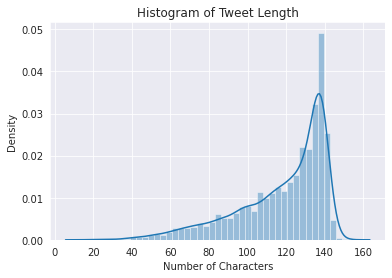

In [ ]:
sns.distplot(text_df['length'])
plt.title("Histogram of Tweet Length")
plt.xlabel("Number of Characters")
plt.ylabel("Density")
plt.show()

In [ ]:
min(text_df['length']), max(text_df['length'])

(17, 152)

In [ ]:
text_df.head()

,text,length,target
0,From jaywalking to strong-arm robbery. \n\nMhm...,57,1
1,Andreas Lubitiz was 'deemed unsuitable for fli...,133,1
2,"Classes started at 8am, but by 7am #MichaelBro...",134,0
3,French MP says those who attacked Charlie Hebd...,100,0
4,Protest continues in front of #ferguson police...,136,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


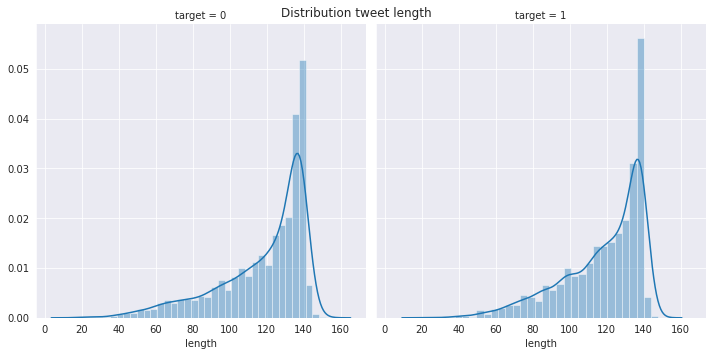

In [ ]:
g = sns.FacetGrid(text_df,col='target',height=5)
g=g.map(sns.distplot,"length")
plt.suptitle("Distribution tweet length")
plt.show()

In [ ]:
def remove_pattern(input_txt,pattern):
  r = re.findall(pattern,input_txt)
  for i in r:
    input_txt = re.sub(i,'',input_txt)
  return input_txt

text_df['text'] = np.vectorize(remove_pattern)(text_df['text'],"#[\w]*")
text_df['text'] = text_df['text'].str.replace("[^a-zA-Z#]", " ")
text_df['text'] = text_df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
text_df['tweet'] = text_df['text'].str.lower()

stops = set(stopwords.words('english'))

text_df['tokenized_sents'] = text_df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

def remove_stops(row):
    my_list = row['tokenized_sents']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

text_df['clean_tweet'] = text_df.apply(remove_stops, axis=1)
text_df.drop(["tweet","tokenized_sents"], axis = 1, inplace = True)

def rejoin_words(row):
    my_list = row['clean_tweet']
    joined_words = ( " ".join(my_list))
    return joined_words

text_df['clean_tweet'] = text_df.apply(rejoin_words, axis=1)

In [ ]:
text_df.head()

,text,length,target,clean_tweet
0,From jaywalking strong robbery,57,1,From jaywalking strong robbery
1,Andreas Lubitiz deemed unsuitable flight dutie...,133,1,Andreas Lubitiz deemed unsuitable flight dutie...
2,Classes started would there waiting eager http...,134,0,Classes started would waiting eager http SVaqe...
3,French says those attacked Charlie Hebdo murde...,100,0,French says attacked Charlie Hebdo murderers b...
4,Protest continues front police dept people uni...,136,0,Protest continues front police dept people uni...


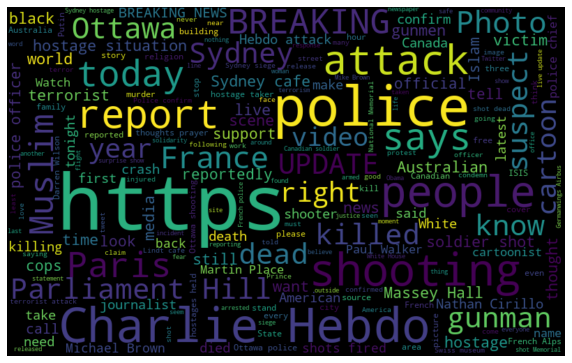

In [ ]:
from wordcloud import WordCloud

all_word = ' '.join([text for text in text_df['clean_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_word) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

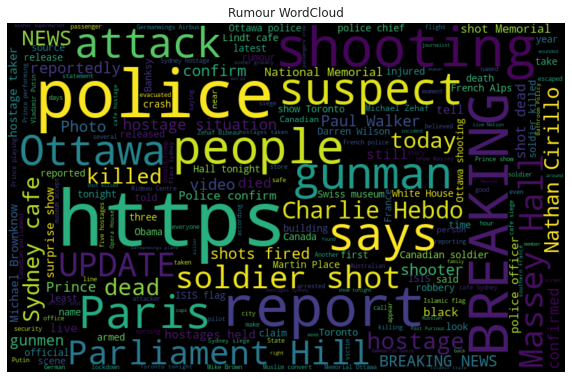

In [ ]:
#Rumour WordCloud


normal_words =' '.join([text for text in text_df['clean_tweet'][text_df['target'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Rumour WordCloud')
plt.show()

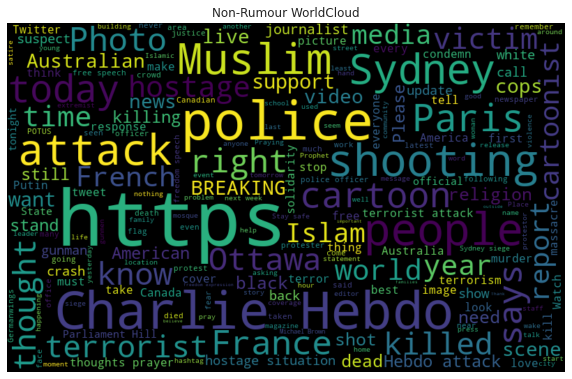

In [ ]:
#Truth WordCloud
normal_words =' '.join([text for text in text_df['clean_tweet'][text_df['target'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Non-Rumour WorldCloud')
plt.show()

In [ ]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [ ]:
import string
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'URL',text)
  
def remove_HTML(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
 
def remove_not_ASCII(text):
    text = ''.join([word for word in text if word in string.printable])
    return text
 
def word_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word
 
def replace_abbrev(text):
    string = ""
    for word in text.split():
        string += word_abbrev(word) + " "        
    return string
 
def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'NUMBER', text)
 
def remove_mention(text):
    at=re.compile(r'@\S+')
    return at.sub(r'USER',text)
 
def remove_all_punct(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)
 
def remove_punct(text):
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" 
    for p in punctuations:
        text = text.replace(p, f' {p} ')
 
    text = text.replace('...', ' ... ')
    if '...' not in text:
        text = text.replace('..', ' ... ')   
    return text
 
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stop_list)])
    return text

In [ ]:
def clean_tweet(text):
  text = remove_URL(text)
  text = remove_HTML(text)
  text = remove_not_ASCII(text)
  text = text.lower()
  text = replace_abbrev(text)
  text = remove_mention(text)
  text = remove_number(text)
  text = remove_punct(text)
  text = remove_stopwords(text)
  return text

In [ ]:
text_df['clean_tweet']=text_df['clean_tweet'].apply(clean_tweet)

In [ ]:
print(text_df)

                                                   text  ...                                        clean_tweet
0                        From jaywalking strong robbery  ...                          jaywalking strong robbery
1     Andreas Lubitiz deemed unsuitable flight dutie...  ...  andreas lubitiz deemed unsuitable flight dutie...
2     Classes started would there waiting eager http...  ...  classes started would waiting eager http svaqe...
3     French says those attacked Charlie Hebdo murde...  ...  french says attacked charlie hebdo murderers b...
4     Protest continues front police dept people uni...  ...  protest continues front police dept people uni...
...                                                 ...  ...                                                ...
8319         photo black nurses saving life member http  ...         photo black nurses saving life member http
8320  British number Andy Murray beats Australia Gro...  ...  british number andy murray beats australia

In [ ]:
text_df["clean_tokens"] = text_df["clean_tweet"].apply(lambda x: word_tokenize(x))

In [ ]:
print(text_df['clean_tokens'])

0                           [jaywalking, strong, robbery]
1       [andreas, lubitiz, deemed, unsuitable, flight,...
2       [classes, started, would, waiting, eager, http...
3       [french, says, attacked, charlie, hebdo, murde...
4       [protest, continues, front, police, dept, peop...
                              ...                        
8319    [photo, black, nurses, saving, life, member, h...
8320    [british, number, andy, murray, beats, austral...
8321                                [minutes, discussing]
8322    [video, australian, police, talking, gunman, h...
8323    [sydney, near, martin, place, tweet, police, m...
Name: clean_tokens, Length: 8324, dtype: object


In [ ]:
text_df.head()

,text,length,target,clean_tweet,clean_tokens
0,From jaywalking strong robbery,57,1,jaywalking strong robbery,"[jaywalking, strong, robbery]"
1,Andreas Lubitiz deemed unsuitable flight dutie...,133,1,andreas lubitiz deemed unsuitable flight dutie...,"[andreas, lubitiz, deemed, unsuitable, flight,..."
2,Classes started would there waiting eager http...,134,0,classes started would waiting eager http svaqe...,"[classes, started, would, waiting, eager, http..."
3,French says those attacked Charlie Hebdo murde...,100,0,french says attacked charlie hebdo murderers b...,"[french, says, attacked, charlie, hebdo, murde..."
4,Protest continues front police dept people uni...,136,0,protest continues front police dept people uni...,"[protest, continues, front, police, dept, peop..."


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(text_df['clean_tweet'],text_df['target'],random_state=42)

In [ ]:
print(X_train)

2080    eiffel tower went dark last night remember vic...
1565    meet indian islamist politician wants award ki...
7308    putin absence indicate palace coup moscow http...
4450    bern announce gurlitt bequest decision monday ...
5170    touching tribute fallen soldier http bhsvsm ht...
                              ...                        
5734    approached mouthing eyewitness testimonies ref...
5191    media told leave expect statements http qclf f...
5390        paramedics currently carrying number hostages
860           frustrating talking robbery killing unarmed
7270    breaking hostages woman safety sydney cafe aus...
Name: clean_tweet, Length: 6243, dtype: object


In [ ]:
MAX_NB_WORDS=100000

In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True, char_level=False)
tokenizer.fit_on_texts(X_test)
tokenizer.fit_on_texts(X_train)
word_seq_train = tokenizer.texts_to_sequences(X_train)
word_seq_test = tokenizer.texts_to_sequences(X_test)
word_index = tokenizer.word_index

max_seq_len = np.round(text_df['length'].mean()+text_df['length'].std()).astype(int)

word_seq_train = sequence.pad_sequences(word_seq_train, maxlen=max_seq_len)
word_seq_test = sequence.pad_sequences(word_seq_test, maxlen=max_seq_len)

In [ ]:
batch_size = 256
num_epochs = 40

num_filters = 64
embed_dim = 300
weight_decay = 1e-4

In [ ]:
#embedding matrix

print('preparing embedding matrix...')

words_not_found = []
nb_words = min(MAX_NB_WORDS, len(word_index)+1)
embedding_matrix = np.zeros((nb_words, embed_dim))

for word, i in word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

preparing embedding matrix...
number of null word embeddings: 8285


In [ ]:
print("sample words not found: ", np.random.choice(words_not_found, 10))

sample words not found:  ['ujqp' 'xeuo' 'taqe' 'uqqztoxg' 'lhjhhyk' 'hxwr' 'lwwifzxb' 'rfor' 'hrsy'
 'wuavg']


In [ ]:
from keras.layers import BatchNormalization
import tensorflow as tf

model = tf.keras.Sequential()

model.add(Embedding(nb_words,embed_dim,input_length=max_seq_len, weights=[embedding_matrix],trainable=False))

model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(64,return_sequences= True)))
#model.add(Bidirectional(LSTM(32)))

model.add(Dense(16,activation='relu'))

model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 141, 300)          4897200   
_________________________________________________________________
dropout (Dropout)            (None, 141, 300)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 141, 128)          186880    
_________________________________________________________________
dense (Dense)                (None, 141, 16)           2064      
_________________________________________________________________
dense_1 (Dense)              (None, 141, 1)            17        
Total params: 5,086,161
Trainable params: 188,961
Non-trainable params: 4,897,200
_________________________________________________________________


In [ ]:

from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
!pip install livelossplot
from livelossplot import PlotLossesKeras

In [ ]:
checkpoint_path = "/content/drive/MyDrive/Rumor Detection/models/Text_model"
checkpoint_dir = os.path.dirname(checkpoint_path)

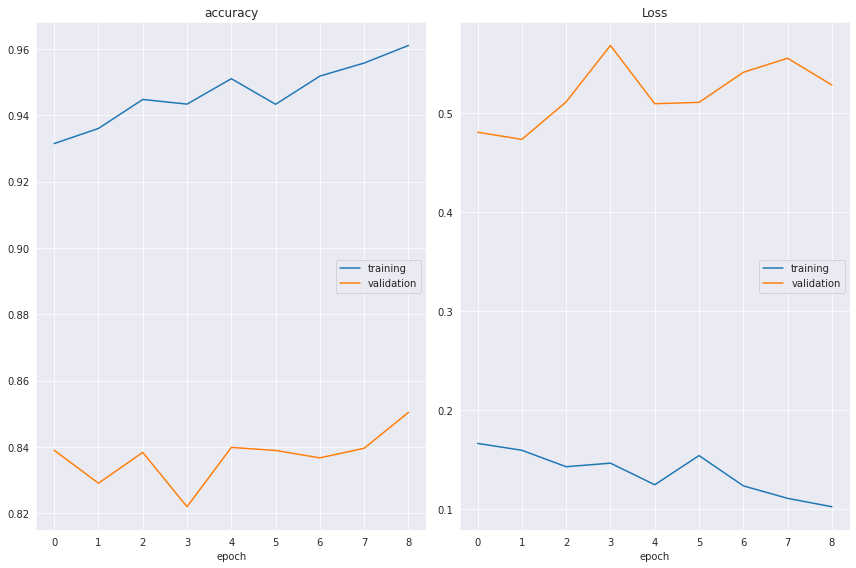

accuracy
	training         	 (min:    0.931, max:    0.961, cur:    0.961)
	validation       	 (min:    0.822, max:    0.850, cur:    0.850)
Loss
	training         	 (min:    0.103, max:    0.166, cur:    0.103)
	validation       	 (min:    0.473, max:    0.568, cur:    0.528)

Epoch 00009: saving model to /content/drive/MyDrive/Rumor Detection/models/Text_model


In [ ]:
es_callback = EarlyStopping(monitor='val_loss', patience=7,mode='min')
callbacks = [PlotLossesKeras()]
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

#history = model.fit(word_seq_train, y_train, batch_size=256,epochs=num_epochs, validation_split=0.3, callbacks=[es_callback], shuffle=False)
model.fit(word_seq_train,y_train,epochs=150,batch_size=10,validation_data=(word_seq_test,y_test),callbacks=[callbacks,es_callback,cp_callback])

In [ ]:
model.save('/content/drive/MyDrive/Rumor Detection/models/Text_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Rumor Detection/models/Text_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Rumor Detection/models/Text_model/assets


In [ ]:
os.listdir(checkpoint_dir)

['tweet_user_metadata_model',
 'user_meta_model',
 'Tweet_meta__model',
 'Text_model',
 '.ipynb_checkpoints',
 'Text_model.data-00000-of-00001',
 'Text_model.index',
 'checkpoint']

In [ ]:
y_pred = model.predict(word_seq_test)

In [ ]:
score = model.evaluate(word_seq_test, y_test, verbose = 2)
score

66/66 - 1s - loss: 0.5283 - accuracy: 0.8504


[0.528276264667511, 0.8504299521446228]

In [ ]:
word_seq_test

array([[   0,    0,    0, ..., 3604,    1, 3605],
       [   0,    0,    0, ...,  209,  705,    1],
       [   0,    0,    0, ..., 3607, 1411,   23],
       ...,
       [   0,    0,    0, ...,   72, 4433,  192],
       [   0,    0,    0, ..., 3112,    1, 8228],
       [   0,    0,    0, ...,   80,  309,   12]], dtype=int32)

In [ ]:
y_pred,y_test

(array([[[0.9930241 ],
         [0.9928227 ],
         [0.99280643],
         ...,
         [0.99947447],
         [0.9995011 ],
         [0.99942577]],
 
        [[0.00455741],
         [0.00429831],
         [0.00404708],
         ...,
         [0.01614157],
         [0.00110423],
         [0.00214186]],
 
        [[0.79901594],
         [0.78853947],
         [0.78243315],
         ...,
         [0.9613874 ],
         [0.9794093 ],
         [0.95211834]],
 
        ...,
 
        [[0.9918834 ],
         [0.9916636 ],
         [0.9916591 ],
         ...,
         [0.99999833],
         [0.9999981 ],
         [0.99999857]],
 
        [[0.9249915 ],
         [0.92051375],
         [0.9179101 ],
         ...,
         [0.9996643 ],
         [0.999699  ],
         [0.9996151 ]],
 
        [[0.94017375],
         [0.93660665],
         [0.9345611 ],
         ...,
         [0.9269472 ],
         [0.9877465 ],
         [0.996218  ]]], dtype=float32), 7363    1
 1346    0
 3071    1
 4734   

In [ ]:
y_pred = y_pred > 0.5
print(y_pred)

#cm = confusion_matrix(y_test,y_pred)
#cm

[[[ True]
  [ True]
  [ True]
  ...
  [ True]
  [ True]
  [ True]]

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 [[ True]
  [ True]
  [ True]
  ...
  [ True]
  [ True]
  [ True]]

 ...

 [[ True]
  [ True]
  [ True]
  ...
  [ True]
  [ True]
  [ True]]

 [[ True]
  [ True]
  [ True]
  ...
  [ True]
  [ True]
  [ True]]

 [[ True]
  [ True]
  [ True]
  ...
  [ True]
  [ True]
  [ True]]]


In [ ]:
y_test=y_test.astype('bool')

In [ ]:
y_test

7363     True
1346    False
3071     True
4734    False
4597    False
        ...  
904      True
7931    False
4012     True
6364     True
3755    False
Name: target, Length: 2081, dtype: bool